In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving retail_sales_dataset (1).csv to retail_sales_dataset (1).csv


#**Data Loading and Cleaning**

In [ ]:
retail = pd.read_csv('retail_sales_dataset (1).csv')

In [ ]:
print(retail.columns)

Index(['Transaction ID', 'Date', 'Customer ID', 'Gender', 'Age',
       'Product Category', 'Quantity', 'Price per Unit', 'Total Amount'],
      dtype='object')


In [ ]:
retail.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [ ]:
print("Shape of the dataset:", retail.shape)

Shape of the dataset: (1000, 9)


In [ ]:
retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


In [ ]:
retail.describe()

,Transaction ID,Age,Quantity,Price per Unit,Total Amount
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,41.39200,2.514000,179.890000,456.000000
std,288.819436,13.68143,1.132734,189.681356,559.997632
min,1.000000,18.00000,1.000000,25.000000,25.000000
25%,250.750000,29.00000,1.000000,30.000000,60.000000
50%,500.500000,42.00000,3.000000,50.000000,135.000000
75%,750.250000,53.00000,4.000000,300.000000,900.000000
max,1000.000000,64.00000,4.000000,500.000000,2000.000000


In [ ]:
print(retail.isnull().sum())

Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64


No missing values so we can proceed

In [ ]:
print(retail.dtypes)

Transaction ID       int64
Date                object
Customer ID         object
Gender              object
Age                  int64
Product Category    object
Quantity             int64
Price per Unit       int64
Total Amount         int64
dtype: object


In [ ]:
retail['Date'] = pd.to_datetime(retail['Date'])

In [ ]:
print(retail.dtypes)

Transaction ID               int64
Date                datetime64[ns]
Customer ID                 object
Gender                      object
Age                          int64
Product Category            object
Quantity                     int64
Price per Unit               int64
Total Amount                 int64
dtype: object


In [ ]:
duplicates = retail.duplicated().sum()
print("Number of duplicate rows:", duplicates)

Number of duplicate rows: 0


#**Descriptive Statistics**

In [ ]:
 #For total amount
mean_total_amount = retail['Total Amount'].mean()
print("Mean Total Amount:", mean_total_amount)

median_total_amount = retail['Total Amount'].median()
print("Median Total Amount:", median_total_amount)

mode_total_amount = retail['Total Amount'].mode()
print("Mode Total Amount:", mode_total_amount.tolist())

std_dev_total_amount = retail['Total Amount'].std()
print("Standard Deviation Total Amount:", std_dev_total_amount)

Mean Total Amount: 456.0
Median Total Amount: 135.0
Mode Total Amount: [50]
Standard Deviation Total Amount: 559.997631555123


In [ ]:
#For Age

mean_age = retail['Age'].mean()
print("Mean Age:", mean_age)

median_age = retail['Age'].median()
print("Median Age:", median_age)

mode_age = retail['Age'].mode()[0]
print("Mode Age:", mode_age)

std_age = retail['Age'].std()
print("Standard Deviation Age:", std_age)

Mean Age: 41.392
Median Age: 42.0
Mode Age: 43
Standard Deviation Age: 13.681429659122532


In [ ]:
# For Quantity column
mean_quantity = retail['Quantity'].mean()
print("Mean Quantity:", mean_quantity)

median_quantity = retail['Quantity'].median()
print("Median Quantity:", median_quantity)

mode_quantity = retail['Quantity'].mode()[0]
print("Mode Quantity:", mode_quantity)

std_quantity = retail['Quantity'].std()
print("Standard Deviation Quantity:", std_quantity)

Mean Quantity: 2.514
Median Quantity: 3.0
Mode Quantity: 4
Standard Deviation Quantity: 1.1327343409145405


In [ ]:
#for Price per unit column
mean_price_per_unit = retail['Price per Unit'].mean()
print("Mean Price per Unit:", mean_price_per_unit)

median_price_per_unit = retail['Price per Unit'].median()
print("Median Price per Unit:", median_price_per_unit)

mode_price_per_unit = retail['Price per Unit'].mode()[0]
print("Mode Price per Unit:", mode_price_per_unit)

std_price_per_unit = retail['Price per Unit'].std()
print("Standard Deviation Price per Unit:", std_price_per_unit)

Mean Price per Unit: 179.89
Median Price per Unit: 50.0
Mode Price per Unit: 50
Standard Deviation Price per Unit: 189.68135627129138


In [ ]:
#for Product Category
print("Descriptive Statistics for Product Category:")

# Frequency counts
product_category_counts = retail['Product Category'].value_counts()
print("Frequency Counts:")
print(product_category_counts)

# Mode
mode_product_category = retail['Product Category'].mode()[0]
print("\nMode Product Category:", mode_product_category)

# Proportions
product_category_proportions = retail['Product Category'].value_counts(normalize=True) * 100
print("\nProportions (%):")
print(product_category_proportions)

Descriptive Statistics for Product Category:
Frequency Counts:
Product Category
Clothing       351
Electronics    342
Beauty         307
Name: count, dtype: int64

Mode Product Category: Clothing

Proportions (%):
Product Category
Clothing       35.1
Electronics    34.2
Beauty         30.7
Name: proportion, dtype: float64


From the above, we can see that clothing is the most frequently purchased category as well as the most common purchase among customers.
The numbers for Beauty and Electronics indicate that there is a strong interest among customers.
The relatively close numbers indicate that increasing marketing efforts in all three categories, and capitalizing on the popularity of Clothing, would boost sales.

In [ ]:
# Descriptive statistics for Gender
print("\nDescriptive Statistics for Gender:")

# Frequency counts
gender_counts = retail['Gender'].value_counts()
print("Frequency Counts:")
print(gender_counts)

# Mode
mode_gender = retail['Gender'].mode()[0]
print("\nMode Gender:", mode_gender)

# Proportions
gender_proportions = retail['Gender'].value_counts(normalize=True) * 100
print("\nProportions (%):")
print(gender_proportions)


Descriptive Statistics for Gender:
Frequency Counts:
Gender
Female    510
Male      490
Name: count, dtype: int64

Mode Gender: Female

Proportions (%):
Gender
Female    51.0
Male      49.0
Name: proportion, dtype: float64


The above statistics indicate that there is a dominance of female customers but the difference is minimal.

In [ ]:
print("Total sales: {}".format(retail["Quantity"].sum()))
print("Total profit: {}".format(retail["Total Amount"].sum()))

Total sales: 2514
Total profit: 456000


The Total sales statistics show a solid sales volume while the total profit indicates a siginificant revenue. This suggests that the business is generating considerable income, thus making it profitable.

**Product contribution to total sales**

In [ ]:
# Group by Product Category
product_sales = retail.groupby('Product Category').agg({
    'Quantity': 'sum',
    'Total Amount': 'sum'
}).reset_index()

# Rename columns for clarity
product_sales.columns = ['Product Category', 'Total Quantity Sold', 'Total Sales Amount']

In [ ]:
# Sorting by Total Quantity Sold to find top products
top_products = product_sales.sort_values(by='Total Quantity Sold', ascending=False)
print(top_products)

  Product Category  Total Quantity Sold  Total Sales Amount
1         Clothing                  894              155580
2      Electronics                  849              156905
0           Beauty                  771              143515


<ipython-input-23-1ee7669c012f>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_products.head(10), x='Total Quantity Sold', y='Product Category', palette='viridis')


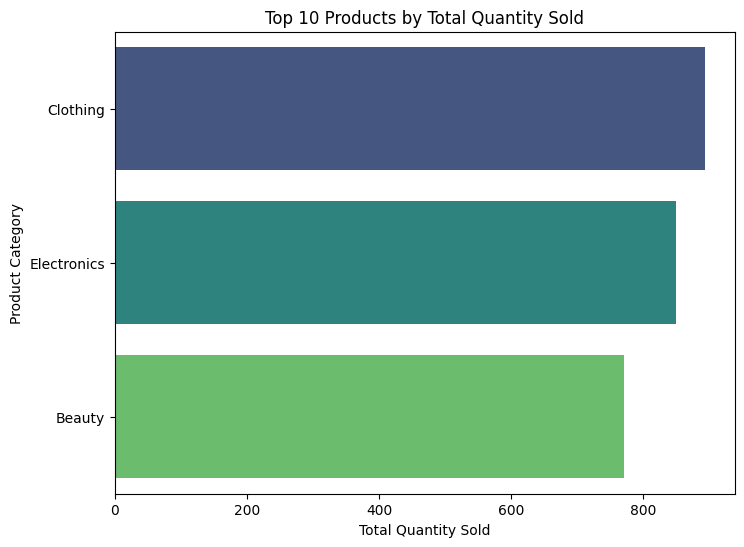

In [ ]:
plt.figure(figsize=(8, 6))
sns.barplot(data=top_products.head(10), x='Total Quantity Sold', y='Product Category', palette='viridis')
plt.title('Top 10 Products by Total Quantity Sold')
plt.xlabel('Total Quantity Sold')
plt.ylabel('Product Category')
plt.show()

**Identifying key products**

In [ ]:
# total sales amount
total_sales = product_sales['Total Sales Amount'].sum()
print(f"Total Sales Amount: {total_sales}")

Total Sales Amount: 456000


In [ ]:
# Sort by Total Sales Amount
product_sales_sorted = product_sales.sort_values(by='Total Sales Amount', ascending=False)

# cumulative sales amount
product_sales_sorted['Cumulative Sales'] = product_sales_sorted['Total Sales Amount'].cumsum()

# percentage contribution of each product category
product_sales_sorted['Percentage of Total Sales'] = (product_sales_sorted['Cumulative Sales'] / total_sales) * 100

In [ ]:
# Identifying key products that contribute to at least 80% of total sales
key_products = product_sales_sorted[product_sales_sorted['Percentage of Total Sales'] <= 80]
print(key_products[['Product Category', 'Total Sales Amount', 'Cumulative Sales', 'Percentage of Total Sales']])

  Product Category  Total Sales Amount  Cumulative Sales  \
2      Electronics              156905            156905   
1         Clothing              155580            312485   

   Percentage of Total Sales  
2                  34.408991  
1                  68.527412  


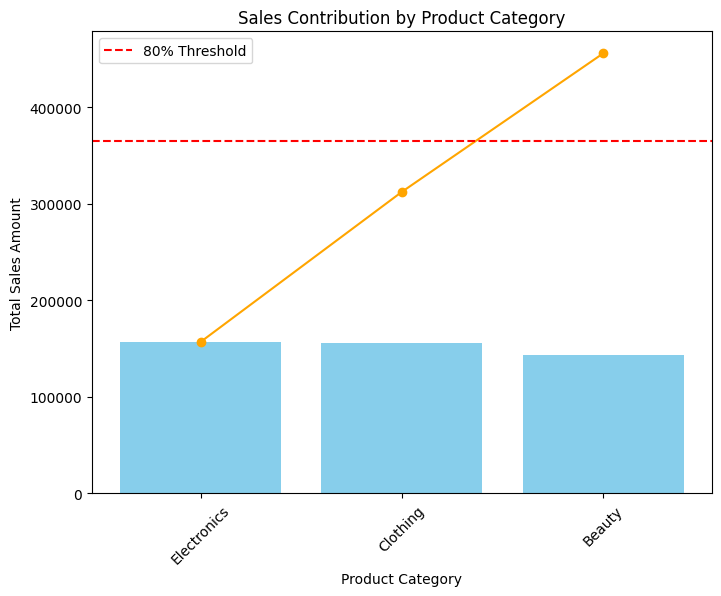

In [ ]:
plt.figure(figsize=(8, 6))
plt.bar(product_sales_sorted['Product Category'], product_sales_sorted['Total Sales Amount'], color='skyblue')
plt.plot(product_sales_sorted['Product Category'], product_sales_sorted['Cumulative Sales'], color='orange', marker='o')
plt.axhline(y=0.8 * total_sales, color='r', linestyle='--', label='80% Threshold')
plt.title('Sales Contribution by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Total Sales Amount')
plt.xticks(rotation=45)
plt.legend()
plt.show()

The chart demonstrates that the Electronics category is key product that contributes significantly to the overall sales, making up the majority of the total sales amount. This suggests that the business should focus its marketing and financial efforts on maintaining and potentially expanding the Electronics category to continue driving sales growth.

#**Time Series Analysis**

**Tracking retail sales over time (daily)**

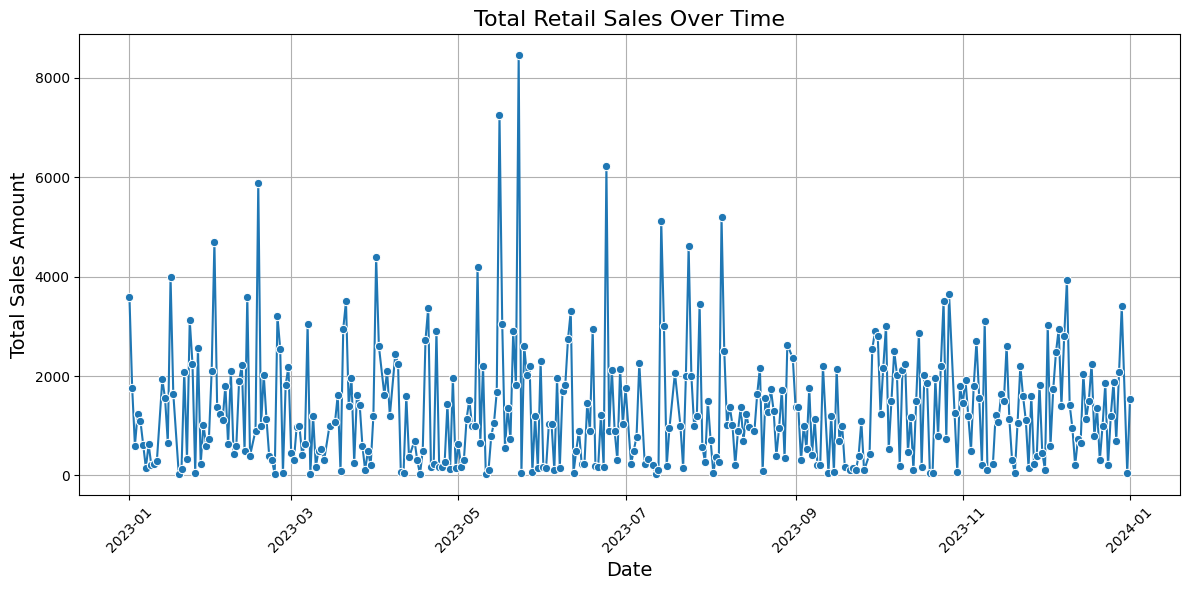

In [ ]:
sales_data = retail.groupby('Date')['Total Amount'].sum().reset_index()
plt.figure(figsize=(12, 6))
sns.lineplot(data=sales_data, x='Date', y='Total Amount', marker='o')
plt.title('Total Retail Sales Over Time', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Total Sales Amount', fontsize=14)
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()

The plot shows a high degree of variability, with significant fluctuations in sales amounts from day to day. However, some broader patterns can be observed, such as higher sales volumes around the end of the year.

**Tracking retail sales over time (Monthly)**

<ipython-input-12-2c5619f63dee>:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = retail.groupby(pd.Grouper(key='Date', freq='M'))['Total Amount'].sum().reset_index()


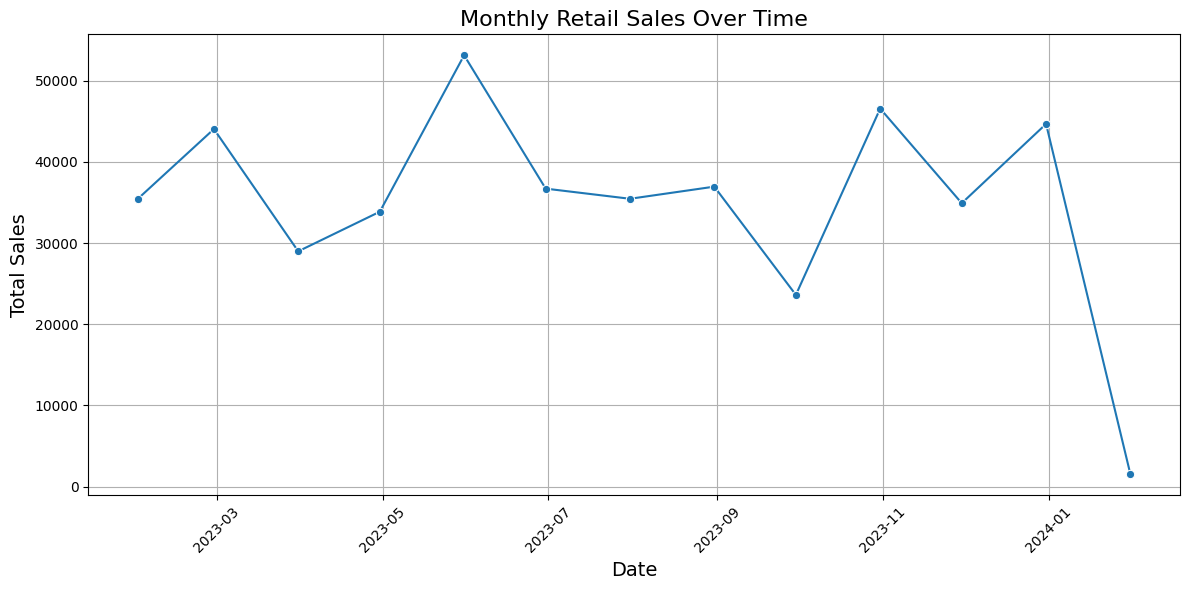

In [ ]:
 #Group the data by month and calculate the total sales
monthly_sales = retail.groupby(pd.Grouper(key='Date', freq='M'))['Total Amount'].sum().reset_index()
monthly_sales.columns = ['Date', 'Total Sales']
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_sales, x='Date', y='Total Sales', marker='o')
plt.title('Monthly Retail Sales Over Time', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Total Sales', fontsize=14)
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()

The monthly data aggregation provides a clearer insight into the sales trend compared to the volatility of the daily sales plot.
The plot shows seasonal patterns with higher sales volume towards the end of the year (November-December) and lower sales during the beginning of the year. This proposes that the retail industry experiences a surge in sales during the holiday season.
The plot also shows that there is a decline in sales over time with a sharp decline observed near the end of the series or the beginning of the next year.

#Analyzing the trend using moving averages

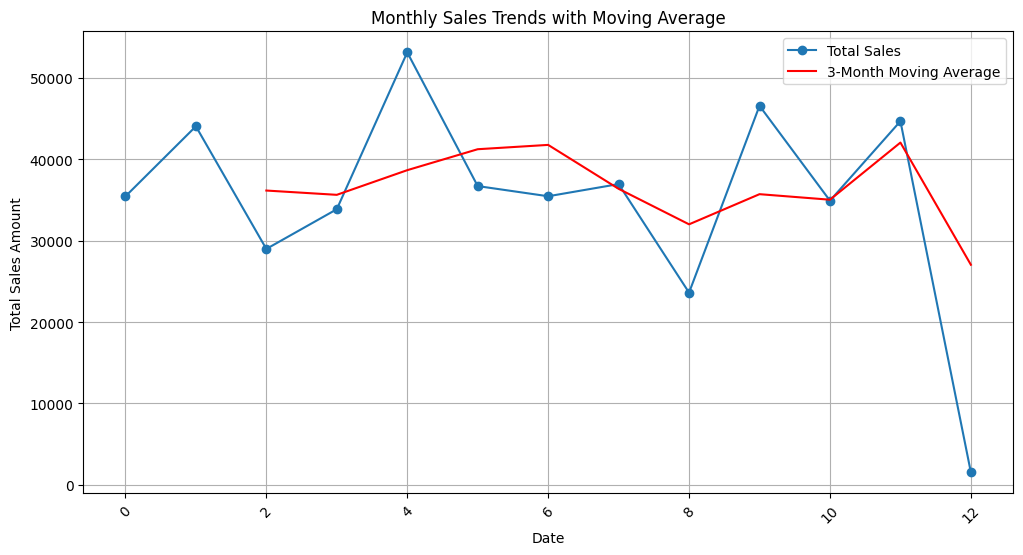

In [ ]:

monthly_sales['Moving Average'] = monthly_sales['Total Sales'].rolling(window=3).mean()
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales.index, monthly_sales['Total Sales'], marker='o', label='Total Sales')
plt.plot(monthly_sales.index, monthly_sales['Moving Average'], color='red', label='3-Month Moving Average')
plt.title('Monthly Sales Trends with Moving Average')
plt.xlabel('Date')
plt.ylabel('Total Sales Amount')
plt.legend()
plt.grid()
plt.xticks(rotation=45)
plt.show()



 The overall trend in sales is declining, as indicated by the decreasing 3-month moving average line. The sales volume has dropped significantly towards the end of the time period shown.



#Forecasting using simple exponential smoothing

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


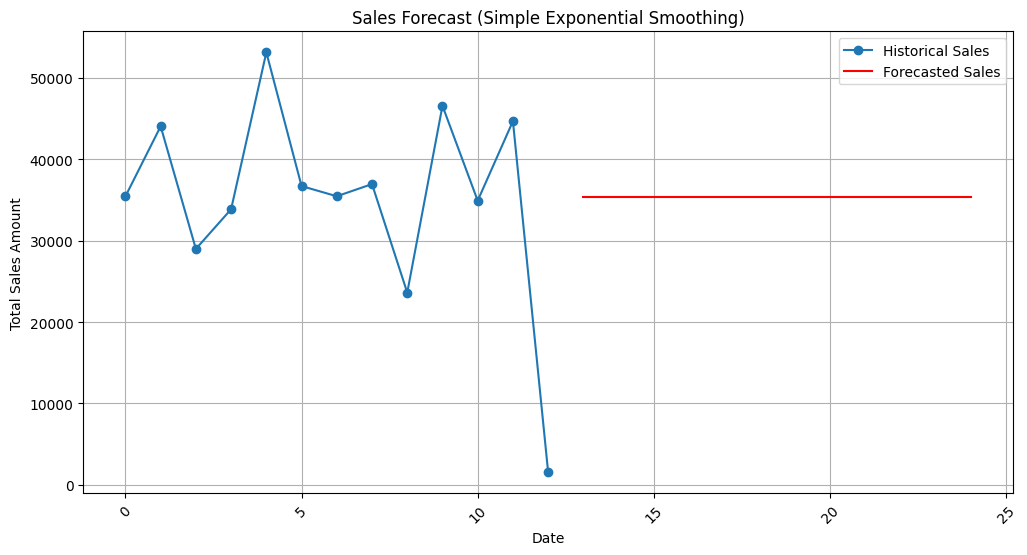

In [ ]:
#Simple exponential smoothing
from statsmodels.tsa.holtwinters import SimpleExpSmoothing


model = SimpleExpSmoothing(monthly_sales['Total Amount'])
fit = model.fit()

# Forecast the next 12 periods (months)
forecast = fit.forecast(12)

plt.figure(figsize=(12, 6))
plt.plot(monthly_sales.index, monthly_sales['Total Amount'], marker='o', label='Historical Sales')
plt.plot(forecast.index, forecast, color='red', label='Forecasted Sales')
plt.title('Sales Forecast (Simple Exponential Smoothing)')
plt.xlabel('Date')
plt.ylabel('Total Sales Amount')
plt.legend()
plt.grid()
plt.xticks(rotation=45)
plt.show()

In the above forecast, the historical sales represented by the blue line show significant fluctuations indicating variability in sales trend. Towards the end of the time period, there is a sharp decline.
The forecasted sales represented by the red line shows stable sales in the future but this does not take into account the decline that was observed by the historical sales.
Overall, while the Simple exponential smoothing gives an insight into the historical sales and volatility, it does not consider the decline observed into its forecast.

#Forecast using holt's linear trend model

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


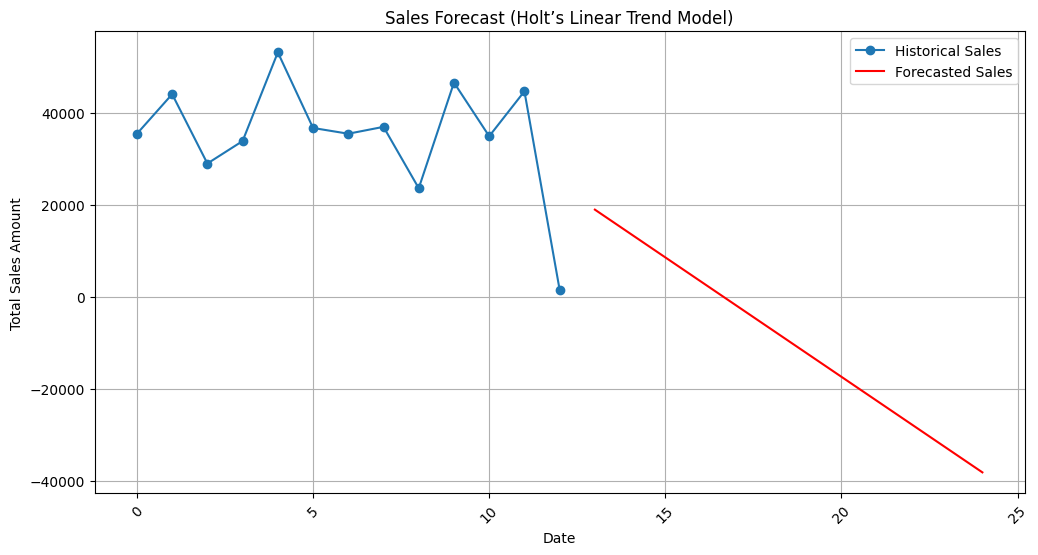

In [ ]:
from statsmodels.tsa.holtwinters import Holt

model = Holt(monthly_sales['Total Amount'])
fit = model.fit()

forecast = fit.forecast(12)

plt.figure(figsize=(12, 6))
plt.plot(monthly_sales.index, monthly_sales['Total Amount'], marker='o', label='Historical Sales')
plt.plot(forecast.index, forecast, color='red', label='Forecasted Sales')
plt.title('Sales Forecast (Holt’s Linear Trend Model)')
plt.xlabel('Date')
plt.ylabel('Total Sales Amount')
plt.legend()
plt.grid()
plt.xticks(rotation=45)
plt.show()

Contrary to the previous model, this model has taken into account the decline observed in the historical sales and predicts sales to continue declining in the future.


#**Customer and Product Analysis**

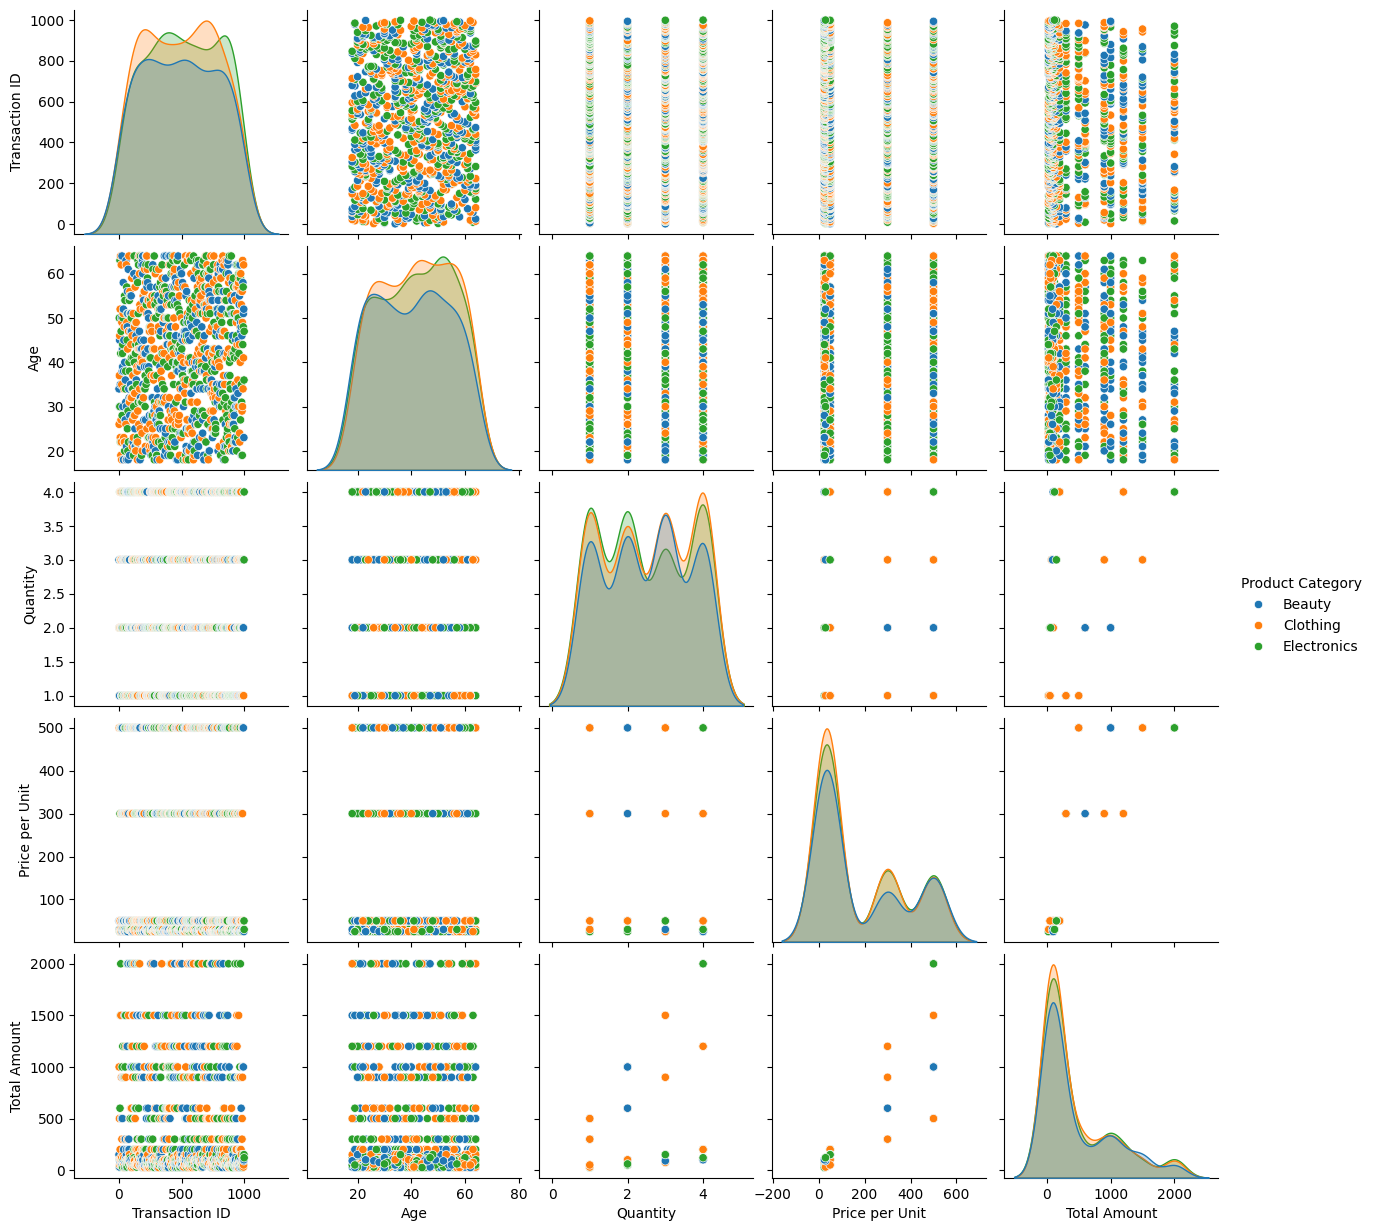

In [ ]:
sns.pairplot(data=retail,hue="Product Category")

<ipython-input-18-c46f6185b3e2>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=retail, x='Gender',  palette='viridis')


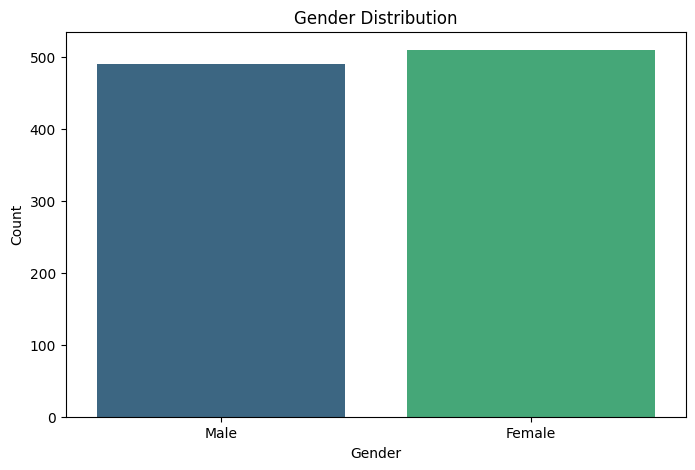

<ipython-input-18-c46f6185b3e2>:11: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(retail['Age'], bins=20, kde=True,  palette='viridis')


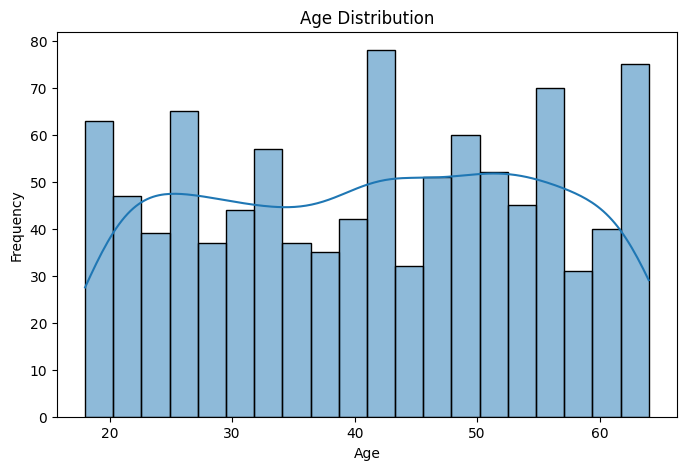

In [ ]:
# Plotting Gender Distribution
plt.figure(figsize=(8, 5))
sns.countplot(data=retail, x='Gender',  palette='viridis')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

# Plotting Age Distribution
plt.figure(figsize=(8, 5))
sns.histplot(retail['Age'], bins=20, kde=True,  palette='viridis')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

**Customer segmentation to segment customers based on purchasing behavior. We can do this by using k-means clustering.**

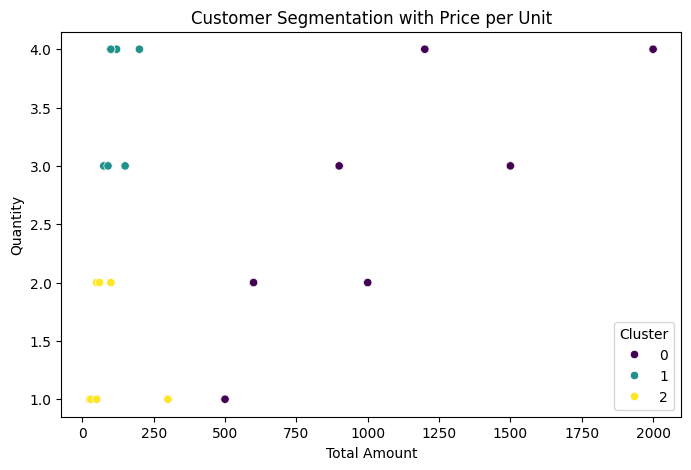

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


customer_summary = retail.groupby('Customer ID').agg({
    'Total Amount': 'sum',
    'Quantity': 'sum',
    'Age': 'mean',
    'Price per Unit': 'mean',
    'Gender': 'first'
}).reset_index()

# Standardization
scaler = StandardScaler()
scaled_data = scaler.fit_transform(customer_summary[['Total Amount', 'Quantity', 'Age', 'Price per Unit']])

# K-Means
kmeans = KMeans(n_clusters=3)
customer_summary['Cluster'] = kmeans.fit_predict(scaled_data)


plt.figure(figsize=(8, 5))
sns.scatterplot(data=customer_summary, x='Total Amount', y='Quantity', hue='Cluster', palette='viridis')
plt.title('Customer Segmentation with Price per Unit')
plt.xlabel('Total Amount')
plt.ylabel('Quantity')
plt.show()

#Analyze purchasing behavior by examining product categories and purchase patterns.

a. Average order value

In [ ]:

#  average order value for each cluster
avg_order_value = customer_summary.groupby('Cluster')['Total Amount'].mean() # Changed customer_retail to customer_summary
print(avg_order_value)

Cluster
0    1111.714286
1     126.453287
2      84.085873
Name: Total Amount, dtype: float64


Customers in cluster 0 make high-value purchases. Creating and maintaining engagement with these customers by offering exclusive deals to loyal customers might benefit the business greatly.

Customers in cluster 2 purchase low-cost items. Presenting these customers with offers such as package deals which would group similar products together and sell them for a good price might enhance engagement with the customers in cluster 2. An additional strategy is to implement targeted campaigns.


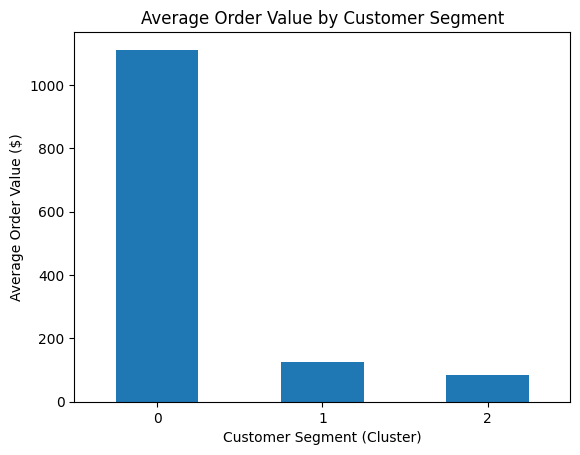

In [ ]:
avg_order_value.plot(kind='bar')
plt.title('Average Order Value by Customer Segment')
plt.xlabel('Customer Segment (Cluster)')
plt.ylabel('Average Order Value ($)')
plt.xticks(rotation=0)
plt.show()

Frequency of purchases

Cluster
0    350
1    289
2    361
Name: Customer ID, dtype: int64


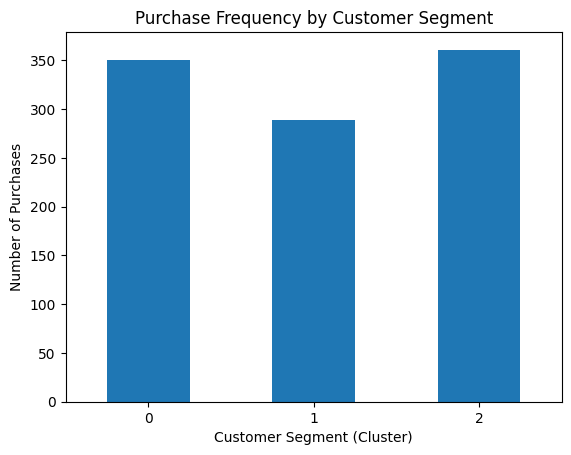

In [ ]:
purchase_frequency = customer_summary.groupby('Cluster')['Customer ID'].count()

print(purchase_frequency)


purchase_frequency.plot(kind='bar')
plt.title('Purchase Frequency by Customer Segment')
plt.xlabel('Customer Segment (Cluster)')
plt.ylabel('Number of Purchases')
plt.xticks(rotation=0)
plt.show()



 The segments with higher purchase frequencies, such as Cluster 0 and Cluster 2, could be considered the most engaged and loyal customers. Strategies targeting these segments, such as exclusive deals or personalized offers, could help maintain and grow these valuable customer groups.

On the other hand, Cluster 1 with a lower purchase frequency may require  targeted re-engagement campaigns to encourage more frequent purchases.

#Product category performance

Total sales by product category

In [ ]:
# Aggregate sales and profit by category
category_performance = retail.groupby('Product Category').agg({
    'Total Amount': 'sum',
    'Quantity': 'sum',
    'Price per Unit': 'sum'
}).reset_index()

category_performance['Average Selling Price'] = category_performance['Total Amount'] / category_performance['Quantity']
category_performance['Profit Margin'] = category_performance['Price per Unit'] / category_performance['Total Amount']

<ipython-input-5-ef918490ef90>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=category_sales, x='Total Amount', y='Product Category', palette='viridis')


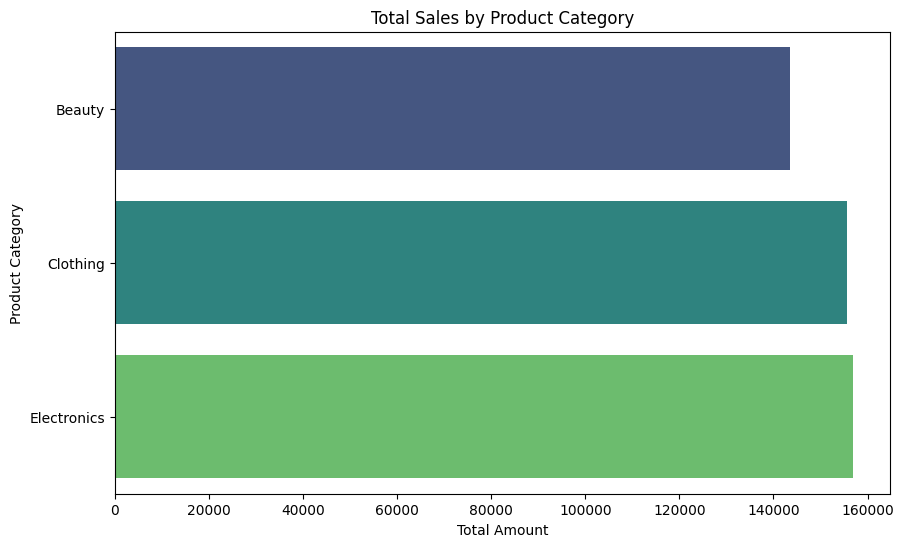

In [ ]:
# total sales by product category
category_sales = retail.groupby('Product Category')['Total Amount'].sum().reset_index()


plt.figure(figsize=(10, 6))
sns.barplot(data=category_sales, x='Total Amount', y='Product Category', palette='viridis')
plt.title('Total Sales by Product Category')
plt.xlabel('Total Amount')
plt.ylabel('Product Category')
plt.show()

In [ ]:
# total revenue and quantity by product category
product_performance = retail.groupby('Product Category')[['Total Amount', 'Quantity']].sum().reset_index()

# Sort by total revenue to get best-selling and underperforming categories
product_performance = product_performance.sort_values('Total Amount', ascending=False)
print(product_performance.head())  # top-selling product categories
print(product_performance.tail())  # underperforming product categories

  Product Category  Total Amount  Quantity
2      Electronics        156905       849
1         Clothing        155580       894
0           Beauty        143515       771
  Product Category  Total Amount  Quantity
2      Electronics        156905       849
1         Clothing        155580       894
0           Beauty        143515       771


b. Average Purchase Value by Gender

<ipython-input-6-c12e5effd406>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=average_purchase, x='Gender', y='Total Amount', palette='viridis')


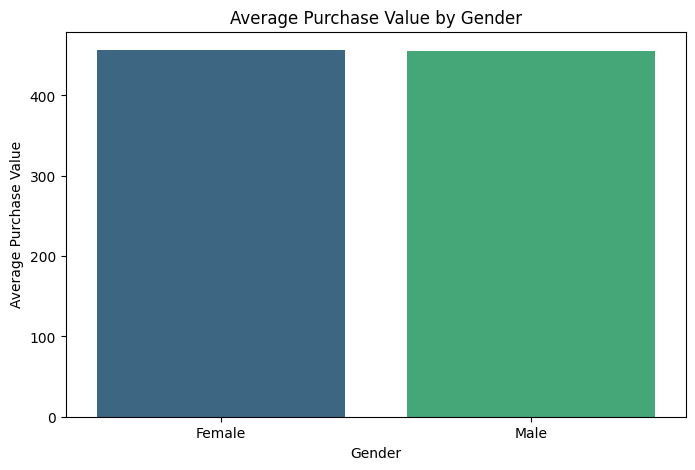

In [ ]:
 #Calculate average purchase value by Gender
average_purchase = retail.groupby('Gender')['Total Amount'].mean().reset_index()

plt.figure(figsize=(8, 5))
sns.barplot(data=average_purchase, x='Gender', y='Total Amount', palette='viridis')
plt.title('Average Purchase Value by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Purchase Value')
plt.show()

                Transaction ID       Age  Quantity  Price per Unit  \
Transaction ID        1.000000  0.065191 -0.026623       -0.060837   
Age                   0.065191  1.000000 -0.023737       -0.038423   
Quantity             -0.026623 -0.023737  1.000000        0.017501   
Price per Unit       -0.060837 -0.038423  0.017501        1.000000   
Total Amount         -0.075034 -0.060568  0.373707        0.851925   

                Total Amount  
Transaction ID     -0.075034  
Age                -0.060568  
Quantity            0.373707  
Price per Unit      0.851925  
Total Amount        1.000000  


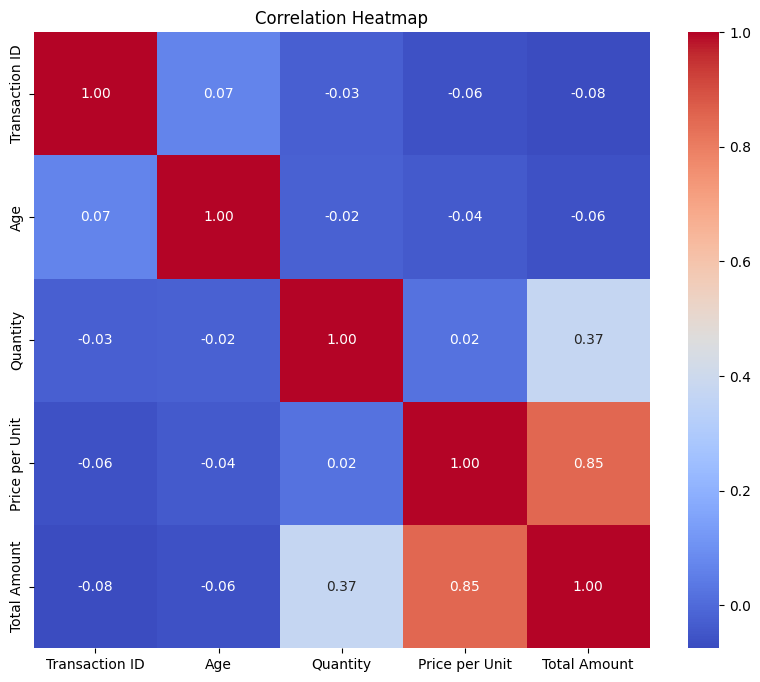

In [ ]:
 # numeric columns for correlation
numeric_df = retail.select_dtypes(include=['number'])

#  correlation matrix
correlation_matrix = numeric_df.corr()
print(correlation_matrix)
# Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title('Correlation Heatmap')
plt.show()

In summary, the analysis in retail sales shows a variability in seasonal trends as well as customer purchasing pattern.
Given this information, creating targeted campaigns that would suit the customers purchasing pattern is crucial.
Capitalizing in the Clothing category while also increasing efforts in the Electronics and Beauty category might elevate the decline that was observed.
Due to the high volatility observed in sales throughout the year, inceasing efforts in customer engagement programs might result in a loyal customer base which would lay the foundation for a highly stable business.